In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
fName = "1_국민관심질병성별입원외래별현황(진료년월).xls"
df = pd.read_excel(fName, header=7)
df.head(6)

,항목,성별구분,입원외래구분,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,환자수.1,내원일수.1,...,환자수.34,내원일수.34,청구건수.34,요양급여비용총액.34,보험자부담금.34,환자수.35,내원일수.35,청구건수.35,요양급여비용총액.35,보험자부담금.35
0,감기,계,계,"4,733,769","6,981,258","6,939,200","117,027,039","85,766,682","3,115,903","4,449,597",...,"2,016,970","2,969,913","2,950,067","55,777,999","41,865,423","1,453,823","2,076,102","2,059,958","40,667,262","30,650,748"
1,감기,남,소계,"2,128,772","3,112,226","3,093,511","52,529,378","38,545,344","1,387,769","1,984,264",...,"905,889","1,354,898","1,345,552","25,669,048","19,322,451","643,218","928,513","920,695","18,516,539","13,996,940"
2,감기,남,외래,"2,124,390","3,084,589","3,084,759","48,914,914","35,453,815","1,384,477","1,962,969",...,"904,400","1,341,828","1,341,985","23,414,405","17,430,189","641,875","917,545","917,665","16,617,641","12,402,977"
3,감기,남,입원,"8,201","27,637","8,752","3,614,464","3,091,529","6,440","21,295",...,"3,289","13,070","3,567","2,254,643","1,892,262","2,769","10,968","3,030","1,898,898","1,593,963"
4,감기,여,소계,"2,604,997","3,869,032","3,845,689","64,497,661","47,221,338","1,728,134","2,465,333",...,"1,111,081","1,615,015","1,604,515","30,108,951","22,542,972","810,605","1,147,589","1,139,263","22,150,723","16,653,809"
5,감기,여,외래,"2,599,946","3,835,966","3,836,137","60,394,899","43,808,944","1,724,574","2,441,060",...,"1,109,532","1,600,847","1,600,985","27,902,906","20,698,182","809,247","1,136,197","1,136,302","20,306,156","15,110,079"


In [4]:
df= df.loc[[2,5]]
df = df.T
df.head()

,2,5
항목,감기,감기
성별구분,남,여
입원외래구분,외래,외래
환자수,"2,124,390","2,599,946"
내원일수,"3,084,589","3,835,966"


In [5]:
df.drop(["항목", "입원외래구분"], inplace=True)
df

,2,5
성별구분,남,여
환자수,"2,124,390","2,599,946"
내원일수,"3,084,589","3,835,966"
청구건수,"3,084,759","3,836,137"
요양급여비용총액,"48,914,914","60,394,899"
...,...,...
환자수.35,"641,875","809,247"
내원일수.35,"917,545","1,136,197"
청구건수.35,"917,665","1,136,302"
요양급여비용총액.35,"16,617,641","20,306,156"


In [6]:
idx = range(1, 180, 5)
idx

range(1, 180, 5)

In [7]:
df = df.iloc[idx, :]
df.head()

,2,5
환자수,"2,124,390","2,599,946"
환자수.1,"1,384,477","1,724,574"
환자수.2,"1,524,456","1,896,769"
환자수.3,"1,627,552","2,049,750"
환자수.4,"1,446,085","1,840,609"


In [8]:
yy = 2018
mm = 1
lstYM =[]
for y in range(2018, 2021):
    for m in range(1, 13):
        lstYM.append(f"{y}년 {m}월")
df.index = lstYM
df.columns = ['남', '여']
df.head(8)

,남,여
2018년 1월,"2,124,390","2,599,946"
2018년 2월,"1,384,477","1,724,574"
2018년 3월,"1,524,456","1,896,769"
2018년 4월,"1,627,552","2,049,750"
2018년 5월,"1,446,085","1,840,609"
2018년 6월,"1,159,169","1,448,104"
2018년 7월,"1,044,899","1,242,130"
2018년 8월,"952,041","1,122,299"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2018년 1월 to 2020년 12월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   남       36 non-null     object
 1   여       36 non-null     object
dtypes: object(2)
memory usage: 864.0+ bytes


In [10]:
df['남'] = pd.to_numeric(df['남'].str.replace(",",""))
df['여'] = pd.to_numeric(df['여'].str.replace(",",""))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2018년 1월 to 2020년 12월
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   남       36 non-null     int64
 1   여       36 non-null     int64
dtypes: int64(2)
memory usage: 864.0+ bytes


C:\Users\도연\AppData\Local\Temp/ipykernel_14492/3336407534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['남'] = pd.to_numeric(df['남'].str.replace(",",""))
C:\Users\도연\AppData\Local\Temp/ipykernel_14492/3336407534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['여'] = pd.to_numeric(df['여'].str.replace(",",""))


In [11]:
df.head(8)

,남,여
2018년 1월,2124390,2599946
2018년 2월,1384477,1724574
2018년 3월,1524456,1896769
2018년 4월,1627552,2049750
2018년 5월,1446085,1840609
2018년 6월,1159169,1448104
2018년 7월,1044899,1242130
2018년 8월,952041,1122299


In [15]:
# 19년도 데이터만 보기 
df.iloc[12:-12]

,남,여
2019년 1월,1502631,1853399
2019년 2월,1179743,1427952
2019년 3월,1497892,1833311
2019년 4월,1733892,2154216
2019년 5월,1492653,1855795
2019년 6월,1088759,1358885
2019년 7월,1061681,1291726
2019년 8월,970211,1145608
2019년 9월,1339981,1630033
2019년 10월,1558204,1963511


In [31]:
# 20년도 데이터만 보기 
df.iloc[24:36]

,남,여
2020년 1월,1772800,2211766
2020년 2월,1100329,1428412
2020년 3월,654022,867853
2020년 4월,536594,678136
2020년 5월,671027,814295
2020년 6월,679313,841349
2020년 7월,650527,801317
2020년 8월,549578,673006
2020년 9월,652708,821278
2020년 10월,759213,941743


In [32]:
lsM = []
for m in range(1, 13): #range(1,13) \ [1,2....,12]
    lsM.append(f"{m}월")
lsM

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [36]:
dfMean1 = df.iloc[:12] # 18년도 감기
dfMean1.index = lsM # groip 연산시 인덱스 맞춰주기
dfMean1

,남,여
1월,2124390,2599946
2월,1384477,1724574
3월,1524456,1896769
4월,1627552,2049750
5월,1446085,1840609
6월,1159169,1448104
7월,1044899,1242130
8월,952041,1122299
9월,1362228,1675246
10월,1584840,2002589


In [39]:
dfMean2 = df.iloc[12:24] # 19년도 감기
dfMean2.index = lsM # groip 연산시 인덱스 맞춰주기


dfMean3 = df.iloc[24:] # 20년도 감기
dfMean3.index = lsM # groip 연산시 인덱스 맞춰주기

dfMean = dfMean1 + dfMean2 + dfMean3 # 18년도 19년도 20년도
dfMean = round(dfMean/3,0)
dfMean

,남,여
1월,1799940.0,2221704.0
2월,1221516.0,1526979.0
3월,1225457.0,1532644.0
4월,1299346.0,1627367.0
5월,1203255.0,1503566.0
6월,975747.0,1216113.0
7월,919036.0,1111724.0
8월,823943.0,980304.0
9월,1118306.0,1375519.0
10월,1300752.0,1635948.0


데이터 시각화

In [40]:
import matplotlib.pyplot as plt

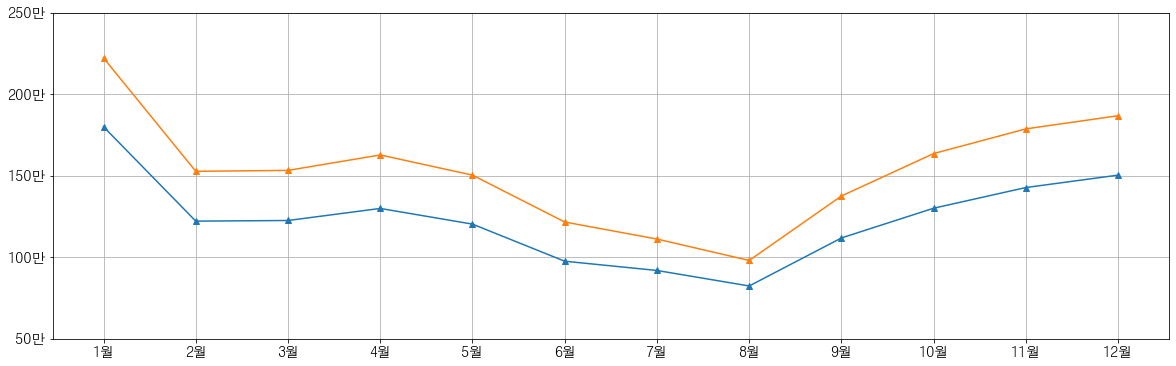

In [47]:
plt.rcParams["font.size"] = 14
plt.figure(figsize=(20,6))
lby = ["50만","100만","150만","200만","250만"]
plt.rc('font', family ="HYGothic-Medium")
plt.plot(dfMean.index, dfMean[['남','여']], marker="^")
plt.yticks(range(500000,3000000,500000),labels = lby)
plt.grid()
plt.show()

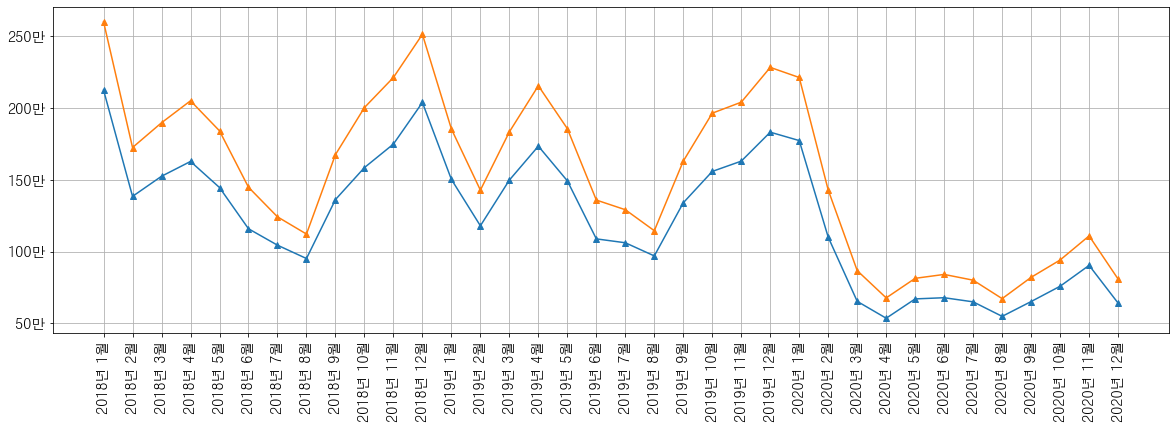

In [50]:
plt.rcParams["font.size"] = 14
plt.figure(figsize=(20,6))
lby = ["50만","100만","150만","200만","250만"]
plt.rc('font', family ="HYGothic-Medium")
plt.plot(df.index, df[['남','여']], marker="^")
plt.yticks(range(500000,3000000,500000),labels = lby)
plt.xticks(rotation=90)
plt.grid()
plt.show()

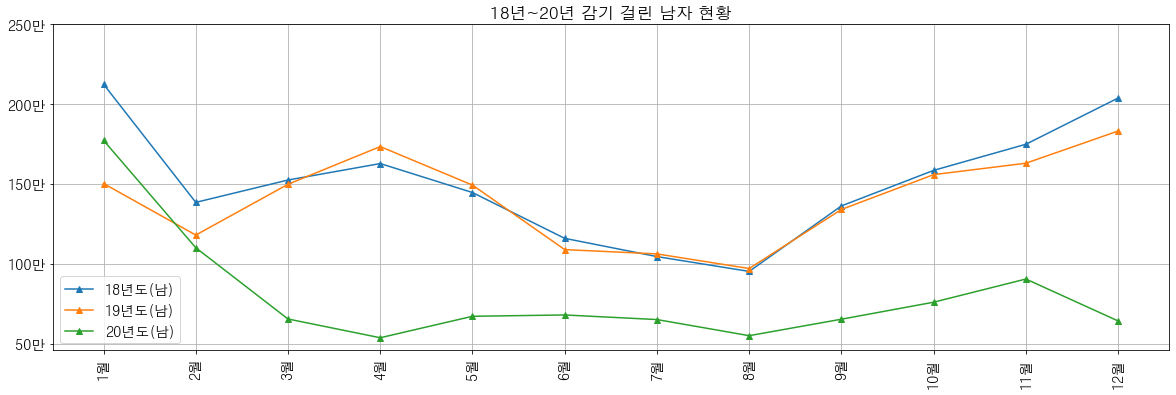

In [53]:
plt.rcParams["font.size"] = 14
plt.figure(figsize=(20,6))
plt.title("18년~20년 감기 걸린 남자 현황")
lby = ["50만","100만","150만","200만","250만"]
plt.rc('font', family ="HYGothic-Medium")
plt.plot(dfMean1.index, dfMean1['남'], marker="^", label="18년도(남)") # 18년도
plt.plot(dfMean2.index, dfMean2['남'], marker="^", label="19년도(남)") # 19년도
plt.plot(dfMean3.index, dfMean3['남'], marker="^", label="20년도(남)") # 20년도
plt.yticks(range(500000,3000000,500000),labels = lby)
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

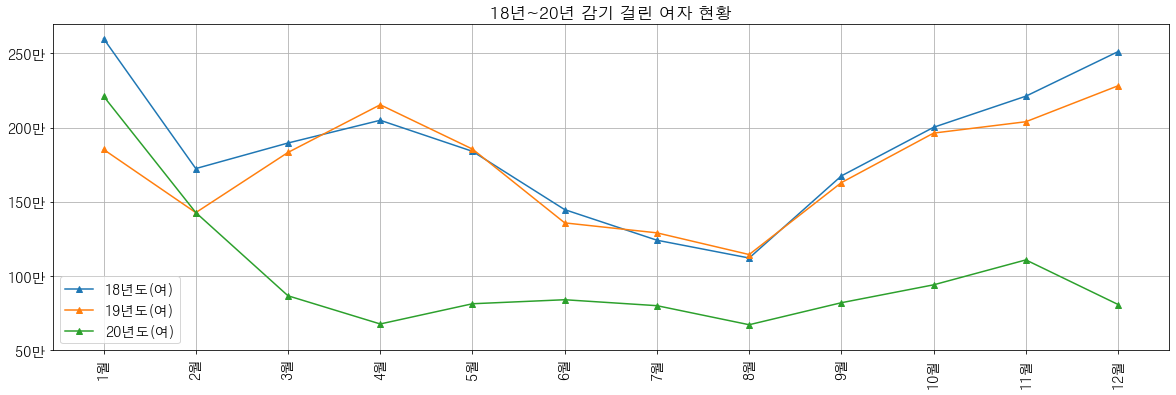

In [55]:
plt.rcParams["font.size"] = 14
plt.figure(figsize=(20,6))
plt.title("18년~20년 감기 걸린 여자 현황")
lby = ["50만","100만","150만","200만","250만"]
plt.rc('font', family ="HYGothic-Medium")
plt.plot(dfMean1.index, dfMean1['여'], marker="^", label="18년도(여)") # 18년도
plt.plot(dfMean2.index, dfMean2['여'], marker="^", label="19년도(여)") # 19년도
plt.plot(dfMean3.index, dfMean3['여'], marker="^", label="20년도(여)") # 20년도
plt.yticks(range(500000,3000000,500000),labels = lby)
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()